Linear Regression:

**Y = wX + b**

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w  =  w - α*dw

b  =  b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

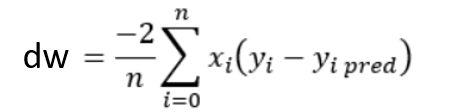


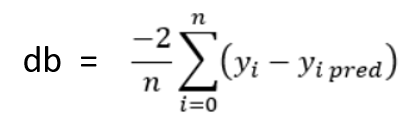

In [1]:
import numpy as np

### Linear_Regression Class Explanation

- **Class Definition**:  
    `Linear_Regression()` is a custom implementation of linear regression using gradient descent.

- **Initialization (`__init__`)**:  
    - `learning_rate`: Controls the step size for updating weights during training.  
    - `no_of_iterations`: Number of times the gradient descent algorithm will run.

- **Fit Method (`fit`)**:  
    - Takes input features `X` and target values `Y`.  
    - Determines the shape of `X` to get the number of samples (`m`) and features (`n`).  
    - Initializes weights (`w`) as zeros and bias (`b`) as zero.  
    - Stores `X` and `Y` for use in other methods.  
    - Runs gradient descent for the specified number of iterations by calling `update_weights()`.

- **Update Weights (`update_weights`)**:  
    - Predicts output using current weights and bias.  
    - Calculates gradients (`dw` for weights, `db` for bias) using the difference between actual and predicted values.  
    - Updates weights and bias by moving in the direction that reduces the error.

- **Predict Method (`predict`)**:  
    - Returns predicted values for given input `X` using the learned weights and bias.

This class provides a simple way to perform linear regression and understand how gradient descent optimizes the model parameters.


In [ ]:
class Linear_Regression():

    def __init__(self,learning_rate,no_of_iterations):

        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
    
    def fit(self, X , Y):

        self.m, self.n = X.shape #number of rows and columns 

        #intiating the weight and bias

        self.w = np.zeros(self.n)  # creates a NumPy array of size n filled with zeros
        self.b = 0
        self.X= X
        self.Y = Y

        for i in range(self.no_of_iterations):
            self.update_weights()
        
    def update_weights(self):

        Y_prediction = self.predict(self.X)

        dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m

        db = - 2 * np.sum(self.Y - Y_prediction)/self.m

        # upadating the weights
    
        self.w = self.w - self.learning_rate*dw
        self.b = self.b - self.learning_rate*db
    


    def predict(self, X):

        return X.dot(self.w) + self.b


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

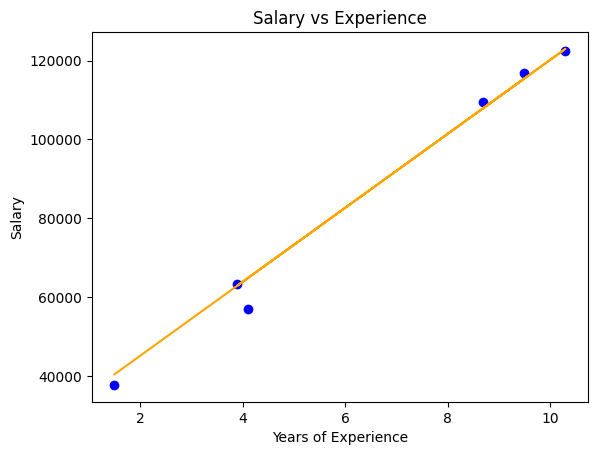

In [ ]:
def main():
    # Load the dataset
    df = pd.read_csv('salary_data.csv')

    X = df.iloc[:,:-1].values  # Features (all columns except the last)
    Y = df.iloc[:,-1].values   # Target variable (last column)

    # Split the dataset into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

    model = Linear_Regression(learning_rate=0.01, no_of_iterations=1000)
    model.fit(X_train, Y_train) 

    Y_pred = model.predict(X_test)

    plt.scatter( X_test, Y_test, color = 'blue' )
    
    plt.plot( X_test, Y_pred, color = 'orange' )
    
    plt.title( 'Salary vs Experience' )
    
    plt.xlabel( 'Years of Experience' )
    
    plt.ylabel( 'Salary' )
    
    plt.show()

if __name__ == "__main__":
    main()  


- **Load the dataset**  
    `df = pd.read_csv('salary_data.csv')`  
    Loads the CSV file containing salary data into a pandas DataFrame.

- **Prepare features and target**  
    `X = df.iloc[:,:-1].values`  
    Selects all columns except the last as features (Years of Experience).  
    `Y = df.iloc[:,-1].values`  
    Selects the last column as the target variable (Salary).

- **Split the dataset**  
    `train_test_split(X, Y, test_size=0.2, random_state=0)`  
    Splits the data into training and testing sets (80% train, 20% test).

- **Initialize the model**  
    `model = Linear_Regression(learning_rate=0.01, no_of_iterations=1000)`  
    Creates an instance of the custom Linear Regression class with specified learning rate and iterations.

- **Train the model**  
    `model.fit(X_train, Y_train)`  
    Fits the model to the training data using gradient descent.

- **Predict on test data**  
    `Y_pred = model.predict(X_test)`  
    Uses the trained model to predict salaries for the test set.

- **Visualize results**  
    `plt.scatter(X_test, Y_test, color='blue')`  
    Plots actual test data points.  
    `plt.plot(X_test, Y_pred, color='orange')`  
    Plots the regression line (predicted salaries).

- **Set plot labels and title**  
    Adds title and axis labels for clarity.

- **Show the plot**  
    `plt.show()`  
    Displays the plot.

- **Main function**  
    Wraps all steps in a `main()` function and runs it if the script is executed directly.
